(acoustics-scattering_discrete)=
# Discrete scatterers

(acoustics-scattering_discrete_why)=
## What are discrete scatterers and why they matter

We call something a **discrete scatterer** when we consider its scattering response on its own, without other scattering sources nearby. Discrete scatterers are extremely useful, because not only can we model individual _things_ in the ocean—a bubble, oil droplet, sand, fish, krill, whale, or even a submarine—as discrete scatterers, we can also model the combined scattering from a group of these things as a _collection_ of discrete scatterers. This allows us to build up models for more complex scenarios, like a patch of seafloor or sea surface, a cloud of bubbles or a school of fish.

When working with discrete scatterers, we often approximate them as **point scatterers** that can be isolated from the rest of the "system" as discussed in the introduction of the [](acoustics-scattering) section. This way, we can think of a scatterer as a _new sound source_ that radiates sound after it is excited by the incident waves, and can immdiately apply the many concepts we have learned in the [](acoustics-source) section here, such directionality.


<!-- DECIDED TO NOT REMOVE BELOW FOR BETTER FLOW AND TO REDUCE CONFUSION -->
<!-- A point scatterer to be **omnidirectional**, meaning that it scatters echoes equally in all directions. Regardless of the directions of the incident sound and the receiver, the echo would always be the same.

A point scatterer can also be **directional**, meaning that it scatter sounds differently depending on the direcitons of the incident sound and the receiver. Most objects in the natural world are directional scatterers. We will explore the scatterer directionality more in the [](acoustics-scattering_discrete_orientation) section below. -->

## Modeling real-world scatterers

When trying to interpret [echograms](acoustics-scattering_echogram), we usually rely on a set of expectations based on the environment and physics to help us understand what we are seeing. Specifically, we consider:
1) the environmental context (e.g., depth, distance to shelf break, etc.) that influences the types of objects that are likely to occur, and
2) how different types of objects scatter sound (i.e. acoustic scattering models).

For example, near an estuary, we may expect to see strong scattering from suspended sediments that have been stirred up by the water flows; near a fishing ground, we may expect to see strong scattering from fish schools.

### Archetypes

There are so many different types of objects and animals in the ocean. How do we model them? It turns out that the rules of physics have helped us construct a few **archetypes** that are really useful in thinking about how something scatterers sound. These are:
- Scatterers with compressible air cavities, such as bubbles and fish with swimbladder.
- "Fluid-like" scatterers that have material properties similar to the surrounding water, such as squid, jellyfish, krill, oil droplets, etc.
- Scatterers containing "elastic" materials that supports both compressional and shear waves, such as shells and dense mineral particles.

On top of these, we consider the sizes and shapes of scatterers, and importantly, **make approximation when we can** to simplify the problem. For example, fish swimbladders are seldom spherical, but at low frequencies, approximating it as a bubble gives pretty good results; krill or shrimps have elongated bodies and many thin legs, but approximating them as fluid-like spheroids also gives pretty good results.

We will explore these properties below.

(acoustics-scattering_discrete_size)=
## Size dependency

(acoustics-scattering_discrete_ka)=
### The mighty $ka$

When we talk about the size of a scatterer, we are really taking about the **relative** size of a scatterer with respect to the acoustic wavelength. We often use a _dimensionless_ number, $ka$, to quantify the relative size. Here, 
- $k=2\pi/\lambda$ is the **acoustic wavenumber**, which represents the [phase](acoustics-receiver_phase) within a wavelength, and 
- $a$ is the **characteristic dimension** of a scatterer, such as the radius of a sphere or the length of a cylinder.

$ka$ is dimensionless, because both $\lambda$ and $a$ are length measures with units of $\textrm{m}$. This allows us to easily compare the echo reponse of a large scatterer at low frquency and a small scatterer at high frequency — not based on the absolute size of the scatterer, but based on the ratio between wavelength and scatterer size.

This is such an important concept that we encourage you to try the widget below again, to remind yourself about what phase angle is and its relationship with the wavenumber $k$.

In [1]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

wavelength = 2

def plot_wave_and_circle(x_val):
    x = np.arange(3601)/3600 * wavelength
    y = np.sin(np.pi*x)

    x_val = x_val * wavelength
    y_val = np.sin(2*np.pi*x_val/wavelength)

    circ_x_val = np.cos(2*np.pi*x_val/wavelength)
    circ_y_val = np.sin(2*np.pi*x_val/wavelength)


    fig = plt.figure(figsize=(8, 3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

    # Sine wave
    ax0 = fig.add_subplot(gs[0])
    
    ax0.plot(x, y, label='y = sin(x)')
    ax0.plot([x_val], [y_val], 'ro')                 # point on sine wave
    ax0.axvline(x_val, color='gray', linestyle='--')
    ax0.axhline(y_val, color='gray', linestyle='--')
    ax0.set_title('Sine Wave')
    ax0.set_xlim(0, 2)
    ax0.set_ylim(-1.1, 1.1)
    ax0.set_xlabel('Wavelength λ', fontsize=12)
    ax0.set_ylabel('y', fontsize=12)
    ax0.set_yticks(np.arange(-1, 1.1, 0.5))
    ax0.grid(True)

    # Unit circle
    ax1 = fig.add_subplot(gs[1], sharey=ax0)
    circle = plt.Circle((0, 0), 1, fill=False, zorder=2)
    ax1.add_artist(circle)
    ax1.plot([0, circ_x_val], [0, circ_y_val], 'r-')  # radius line
    ax1.plot(circ_x_val, circ_y_val, 'ro')        # point on unit circle
    ax1.set_title('Unit Circle')
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_yticks(np.arange(-1, 1.1, 0.5))
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_xticks([-1, 0, 1])

    plt.tight_layout()
    plt.show()

    phase_box.value = f"{x_val / wavelength * 360:6.2f}"
    k_box.value = f"{x_val / wavelength * 2:6.2f}π"
    

phase_box = widgets.Text(
    value=f"{0:6.2f}",
    description='Phase (°)',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="200px")
)

k_box = widgets.Text(
    value=f"{0:6.2f}",
    description='k',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="200px")
)

display(phase_box)
display(k_box)
widgets.interact(
    plot_wave_and_circle,
    x_val=widgets.FloatSlider(
        min=0, max=1, step=0.01, value=0,
        description='Fraction of wavelength λ',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="400px")
    )
)


Text(value='  0.00', description='Phase (°)', layout=Layout(width='200px'), style=TextStyle(description_width=…

Text(value='  0.00', description='k', layout=Layout(width='200px'), style=TextStyle(description_width='initial…

interactive(children=(FloatSlider(value=0.0, description='Fraction of wavelength λ', layout=Layout(width='400p…

<function __main__.plot_wave_and_circle(x_val)>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

from scipy.special import spherical_jn, spherical_yn

import ipywidgets as widgets
from IPython.display import display

In [3]:
# Modal series solutions for elastic and fluid spheres

def Pn(n: int, x: np.array):
    if np.max(np.abs(x)) > 1:
        raise ValueError("|x| must be smaller than 1!")

    pn = np.zeros((x.size, n + 1))
    pn[:, 0] = 1
    if n >= 1:
        pn[:, 1] = x

    for nn in range(1, n):
        pn[:, nn + 1] = ((2 * nn + 1) * x * pn[:, nn] - nn * pn[:, nn - 1]) / (nn + 1)

    return pn[:, n]
    
def fluid_fs(scale, out_flag, para):
    DEG2RAD = np.pi / 180
    ns, x0, xe, g, h = para[:5]
    
    # Create ka array
    if scale == 1:
        ka1 = np.linspace(x0, xe, ns)
    else:
        ka1 = np.logspace(np.log10(x0), np.log10(xe), ns)

    # Determine max mode
    if len(para) < 7:
        Nmax = round(np.max(ka1)) + 10
    else:
        Nmax = para[6]

    ka2 = ka1 / h
    m = len(ka1)
    theta = para[5] * DEG2RAD
    x = np.cos(theta)

    n = np.arange(Nmax)
    nl = 2 * n + 1

    # Compute Legendre polynomials Pn(x)
    pn1 = np.array([Pn(ni, x) for ni in n]).squeeze()

    # Bessel functions and derivatives
    jn1 = np.array([spherical_jn(ni, ka1) for ni in n])  # shape (Nmax, m)
    yn1 = np.array([spherical_yn(ni, ka1) for ni in n])
    djn1 = np.array([spherical_jn(ni, ka1, derivative=True) for ni in n])
    dyn1 = np.array([spherical_yn(ni, ka1, derivative=True) for ni in n])

    jn2 = np.array([spherical_jn(ni, ka2) for ni in n])
    djn2 = np.array([spherical_jn(ni, ka2, derivative=True) for ni in n])

    # Avoid division warnings
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = djn2 * yn1 / (jn2 * djn1) - g * h * dyn1 / djn1
        term2 = djn2 * jn1 / (jn2 * djn1) - g * h
        cn = term1 / term2
        bn = -1 / (1 + 1j * cn)

    # Form function f and amplitude S
    f = np.zeros(m, dtype=complex)
    # S = np.zeros((m, Nmax), dtype=complex)
    for mm in range(m):
        s = nl * pn1 * bn[:, mm]
        f[mm] = np.sum(s)
        # S[mm, :] = s / ka1[mm]

    outx = ka1
    # Choose output based on out_flag
    if out_flag == 1:
        outy = np.abs(2 * f / ka1)  # Modulus of form function
    elif out_flag == 2:
        outy = -1j * 2 * f / ka1  # Complex form function
    elif out_flag == 3:
        outy = np.abs(f) / (np.sqrt(np.pi) * ka1)  # Modulus of normalized scattering amplitude
    elif out_flag == 4:
        outy = -1j * f / (np.sqrt(np.pi) * ka1)  # Complex normalized scattering amplitude
    else:
        raise ValueError("Invalid out_flag value.")

    return outx, outy


def elastic_fs(scale, out_flag, para):
    """
    Elastic sphere scattering model.
    
    Parameters
    ----------
    scale : int  
        1: linear spacing, 2: log spacing
    out_flag : int
        1: modular of form function
        2: complex form function 
        3: modular of normalized scattering amplitude
        4: complex normalized scattering amplitude
    para : list
        [ns, x0, xe, g, hc, hs, theta0/ka0, Nmax(optional)]
        ns: number of points
        x0: start value
        xe: end value
        g: density contrast (rho2/rho1)
        hc: longitudinal sound speed contrast (c2L/c1)
        hs: transverse sound speed contrast (c2T/c1)
        theta0: angle for proc_flag=1 [deg]
        ka0: ka value for proc_flag=2
        Nmax: max number of modes (optional)

    Returns
    -------
    outx : array
        ka or theta values
    outy : array 
        Scattering form function or amplitude
    """
    DEG2RAD = np.pi/180
    
    ns, x0, xe = para[:3]
    g, hc, hs = para[3:6]

    # Scattering vs ka
    if scale == 1:
        ka1 = np.linspace(x0, xe, ns)
    else:
        ka1 = np.logspace(np.log10(x0), np.log10(xe), ns)
        
    ka2L = ka1/hc
    ka2s = ka1/hs
    
    if len(para) < 8:
        Nmax = round(np.max(ka1)) + 10
    else:
        Nmax = para[7]
        
    theta = para[6] * DEG2RAD
    x = np.cos(theta)

    n = np.arange(Nmax)
    nl = 2*n + 1

    # Compute Legendre polynomials Pn(x)
    pn1 = np.array([Pn(ni, x) for ni in n]).squeeze()
    
    # Spherical Bessel functions
    jn1 = np.array([spherical_jn(ni, ka1) for ni in n])
    yn1 = np.array([spherical_yn(ni, ka1) for ni in n])
    djn1 = np.array([spherical_jn(ni, ka1, derivative=True) for ni in n])
    dyn1 = np.array([spherical_yn(ni, ka1, derivative=True) for ni in n])
    
    jn2L = np.array([spherical_jn(ni, ka2L) for ni in n])
    djn2L = np.array([spherical_jn(ni, ka2L, derivative=True) for ni in n])
    
    jn2s = np.array([spherical_jn(ni, ka2s) for ni in n])
    djn2s = np.array([spherical_jn(ni, ka2s, derivative=True) for ni in n])
    
    f = np.zeros(len(ka1), dtype=complex)
    for j in range(len(ka1)):
        nn = n*n + n
        tan1 = -ka2L[j] * djn2L[:, j] / jn2L[:, j]
        tan2 = -ka2s[j] * djn2s[:, j] / jn2s[:, j]
        tan3 = -ka1[j] * djn1[:, j] / jn1[:, j]
        tan_beta = -ka1[j] * dyn1[:, j] / yn1[:, j]
        tan_del = -jn1[:, j] / yn1[:, j]
        
        d1 = tan1 + 1
        d2 = nn - 1 - ka2s[j]**2/2 + tan2
        
        term1a = tan1/d1
        term1b = nn/d2
        term2a = (nn - ka2s[j]**2/2 + 2*tan1)/d1
        term2b = nn*(tan2 + 1)/d2
        
        td = -0.5 * ka2s[j]**2 * (term1a - term1b)/(term2a - term2b)
        tan_phi = -td/g
        tan_eta = tan_del * (tan_phi + tan3)/(tan_phi + tan_beta)
        cos_eta = 1/np.sqrt(1 + tan_eta*tan_eta)
        sin_eta = tan_eta * cos_eta
        
        bn = sin_eta * (1j*cos_eta - sin_eta)
        s = nl * pn1 * bn
        f[j] = np.sum(s)
        
    outx = ka1
    if out_flag == 1:      # modular of form function
        outy = np.abs(2*f/ka1)
    elif out_flag == 2:    # complex form function
        outy = -1j*2*f/ka1
    elif out_flag == 3:    # modular of scattering amplitude
        outy = np.abs(f)/ka1
    elif out_flag == 4:    # complex scattering amplitude
        outy = -1j*f/ka1
    else:
        raise ValueError("out_flag must be within 1-4")
        
    return outx, outy

(acoustics-scattering_discrete_ka)=
### scattering regimes

The scattering response of a given scatterer can be generally described based on the scattering regimes across frequency:

In the **Rayleigh** regime, the acoustic wavelength is very large compared to the scatterer ($ka\ll1$), and the scattering is dominated by diffraction. Here, the exact shape of the scatterer is often not as critical in determining the scattering response, and the scattering cross section scales with frequency with a steep slope proportional to $(ka)^4$.

In the **geometric** regime, the acoustic wavelength is small compared to the scatterer ($ka\gg1$), and the scattering is dominated by reflection. Here, the scattering cross section typically oscillates around a high-frequency limit, with deep spectral nulls due to interference from surface waves or other reflections within the target depending on its material properties.

The figures below show the target strength of a solid tungsten carbide sphere plotted in both linear and log scale along the x-axis. Such spheres are commonly used for calibrating high-frequency sonar systems, since its scattering response can be accurately modeled. 
- On log-scale plot (left), we can easily see the $(ka)^4$ dependency of the Rayleigh regime.
- On the linear-scale plot (right), we can find frequency sections where the TS does not vary rapidly, which are useful for calibration.

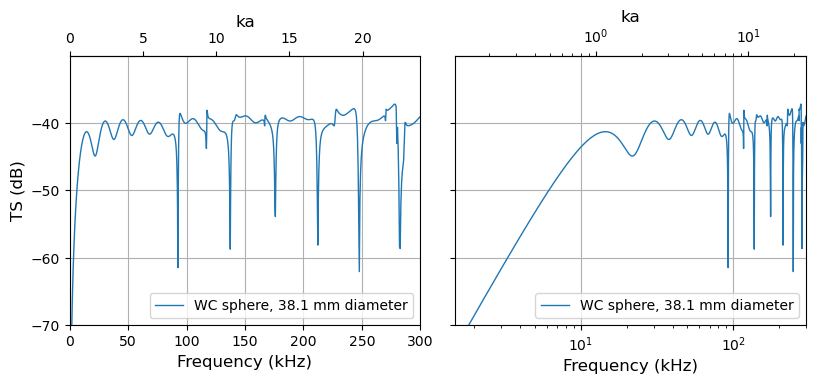

In [4]:
# Tungsten carbide sphere
g = 14.9160  # density constrast
hc = 4.6135  # compressional sound speed contrast
hs = 2.8312  # sheer speed contrast
x0 = 0.001  # starting ka value
xe = 30  # end ka value
theta_ka = 180  # 180: backscattering
                # 0: forward scattering
scale = 2
out_flag = 2  # complex form function

para_ela = [5000, x0, xe, g, hc, hs, theta_ka]
ka_wc, fm_wc = elastic_fs(scale, out_flag, para_ela)

a = 0.0381/2
freq = ka_wc / a * 1500 / 2 / np.pi
TS = 20*np.log10(abs(fm_wc) / 2 * a)

# For plotting secondary axis
c = 1500  # sound speed [m/s]
def freqkHz2ka(f_kHz):
    ka = 2 * np.pi * f_kHz * 1e3 * a / c
    return ka
def ka2freqkHz(ka):
    f = ka * c / (2 * np.pi * a)
    return f/1e3

# Plot
fig, ax = plt.subplots(1, 2, figsize=(9.5, 3.5), sharey=True)
fig.subplots_adjust(wspace=0.1)
for axx in ax:
    axx.plot(freq/1e3, TS, lw=1, label="WC sphere, 38.1 mm diameter")
    axx.set_ylim(-70, -30)
    axx.set_yticks(np.arange(-70, -30, 10))
    axx.set_xlabel("Frequency (kHz)", fontsize=12)
    axx.grid()
    axx.legend(loc="lower right", fontsize=10)

    # Set secondary x-axis
    secax = axx.secondary_xaxis('top', functions=(freqkHz2ka, ka2freqkHz))
    secax.set_xlabel("ka", fontsize=12)

ax[0].set_xscale("linear")
ax[0].set_xlim(0, 300)

ax[1].set_xscale("log")
ax[1].set_xlim([1.5, 300])

ax[0].set_ylabel("TS (dB)", fontsize=12)

plt.show()

:::{admonition} Exercise
Look at the linear-scale plot, can you guess why it is usually not recommended to calibrate a system with transmit frequencies near one of the TS spectral nulls?
:::

(acoustics-scattering_discrete_size_material)=
## Influence of material properties

Scattering phenomena can vary strongly depending on the material composition of scatterers. The figure below shows the TS of spheres of the same size but different material properties:
- Bubbles, or any scatterers that include a compressible air cavity, can **resonate** in the $ka\ll1$ region, producing scattering signals much stronger than similarly sized objects without air.
- "Fluid-like" scatterers are made of materials very similar to the surrounding water medium, which allows sound to easily transmit and reflect through, causing regular interference patterns seen on the TS spectrum.
- "Elastic" scatterers contain dense materials, such as bones, steel or tungsten carbide we saw above, which support complex surface waves that result in complex patterns on the TS spectrum.

Most scatterers contain more than one type of materials, and there the question is whether some mechanisms dominate over the others, and which they are.

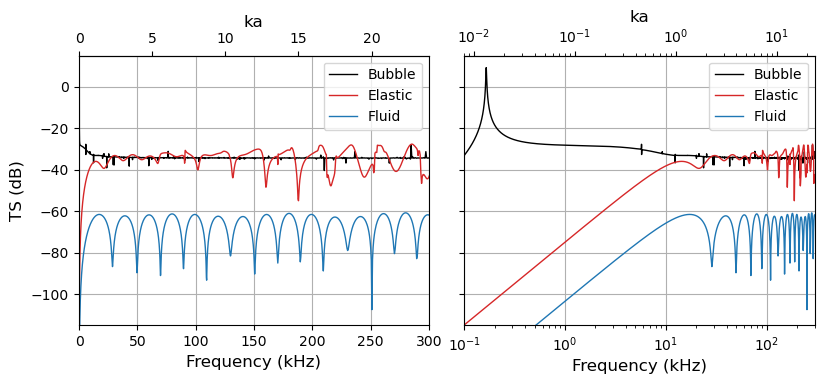

In [5]:
import warnings

n = 5000
theta_ka = 180  # 180: backscattering
                # 0: forward scattering
x0 = 0.001  # starting ka value
xe = 30     # end ka value
scale = 2   # x values at log scale

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # bubble at surface
    para_bubble = [n, x0, xe, 0.0012, 0.22, theta_ka]  # [n x0 xe g h theta_ka]
    [ka_bubble, fm_bubble] = fluid_fs(scale, out_flag, para_bubble)

    # fluid sphere at surface
    para_fluid = [n, x0, xe, 1.026, 1.017, theta_ka]
    [ka_fluid, fm_fluid] = fluid_fs(scale, out_flag, para_fluid)

    # stainless steel
    para_ss = [n, x0, xe, 7.8, 3.74, 2.08, theta_ka]  # [n x0 xe g hc hs theta_ka]
    [ka_elastic, fm_elastic] = elastic_fs(scale, out_flag, para_ss)

a = 0.0381/2  # radius [m]
TS_bubble = 20 * np.log10(abs(fm_bubble)*a)
TS_fluid = 20 * np.log10(abs(fm_fluid)*a)
TS_elastic = 20 * np.log10(abs(fm_elastic)*a)

c = 1500  # sound speed [m/s]
freq = ka_bubble * c / (2 * np.pi * a)

# For plotting secondary axis
def freqkHz2ka(f_kHz):
    ka = 2 * np.pi * f_kHz * 1e3 * a / c
    return ka
def ka2freqkHz(ka):
    f = ka * c / (2 * np.pi * a)
    return f/1e3

fig, ax = plt.subplots(1, 2, figsize=(9.5, 3.5), sharey=True)
fig.subplots_adjust(wspace=0.1)
for axx in ax:
    axx.plot(freq/1e3, TS_bubble, lw=1, color="k", label="Bubble")
    axx.plot(freq/1e3, TS_elastic, lw=1, color="C3", label="Elastic")
    axx.plot(freq/1e3, TS_fluid, lw=1, color="C0", label="Fluid")
    axx.set_ylim(-115, 15)
    plt.grid()
    axx.set_xlabel("Frequency (kHz)", fontsize=12)
    axx.grid()

    # Set secondary x-axis
    secax = axx.secondary_xaxis('top', functions=(freqkHz2ka, ka2freqkHz))
    secax.set_xlabel("ka", fontsize=12)

ax[0].set_xscale("linear")
ax[0].set_xlim([-0.5, 300])
ax[0].legend(loc="upper right", fontsize=10)

ax[1].set_xscale("log")
ax[1].set_xlim([0.1, 300])
ax[1].legend(loc="upper right", fontsize=10)

ax[0].set_ylabel("TS (dB)", fontsize=12)

plt.show()

:::{admonition} Exercise
To get an intuitive feel of how the echoes change depending on the scatterer, use the widget below to answer the following questions:

For the gas bubble:
- How does the resonance frequency change as bubble radius increases or decreases?
- What is the approximate size of a bubble that gives a resonance around 10 Hz?

For the fluid sphere:
- How does the TS spectral pattern change as the radius of the fluid sphere increases or decreases?
- Knowing that the scattering response of a fluid sphere is dominated by the echoes from its front and back interface with the water medium, can you guess why the spectral pattern vary that way?
:::

In [6]:
para_bubble = [1000, 0.001, 25, 0.0012, 0.22, 180]  # bubble at surface
para_fluid = [1000, 0.001, 25, 1.026, 1.017, 180]  # fluid sphere
scale = 2
out_flag = 2  # complex form function


def plot_TS(radius_bubble, radius_fluid, xscale_type):
    freq_bubble = ka_bubble * c / (radius_bubble * 2 * np.pi)
    freq_fluid = ka_fluid * c / (radius_fluid * 2 * np.pi)
    TS_bubble = 20 * np.log10(np.abs(fm_bubble) * radius_bubble/2)
    TS_fluid = 20 * np.log10(np.abs(fm_fluid) * radius_fluid/2)

    plt.figure(figsize=(6, 4))
    plt.plot(freq_bubble, TS_bubble, lw=1.5, label="Gas bubble")
    plt.plot(freq_fluid, TS_fluid, lw=1.5, label="Fluid sphere")
    if xscale_type == "log":
        plt.xlim(np.log10(23), 6e3)
        plt.xscale("log")
    else:
        plt.xlim(0, 6e3)
    plt.ylim(-100, 40)
    plt.xlabel("Frequency (Hz)", fontsize=12)
    plt.ylabel("TS (dB)", fontsize=12)
    plt.legend(loc="upper right")
    plt.title("TS of a gas bubble and a fluid sphere")
    plt.show()


radius_bubble_slider = widgets.FloatSlider(
    min=0.2,
    max=1,
    step=0.01,
    value=0.5,  # default value
    description="Bubble radius (m)",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="400px"),
    continuous_update=True
)

radius_fluid_slider = widgets.FloatSlider(
    min=0.2,
    max=1,
    step=0.01,
    value=0.5,  # default value
    description="Fluid sphere radius (m)",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="400px"),
    continuous_update=True
)

xscale_radio = widgets.RadioButtons(
    options=["linear", "log"],
    value="log",  # default selected
    description="X-axis scale",
    disabled=False,
    style={'description_width': 'initial'},
)


ka_bubble, fm_bubble = fluid_fs(scale, out_flag, para_bubble)
ka_fluid, fm_fluid = fluid_fs(scale, out_flag, para_fluid)

c = 1500  # medium sound speed [m/s]


interactive_plot = widgets.interactive(
    plot_TS, 
    radius_bubble=radius_bubble_slider, 
    radius_fluid=radius_fluid_slider,
    xscale_type=xscale_radio)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='Bubble radius (m)', layout=Layout(width='400px'), ma…

(acoustics-scattering_discrete_orientation)=
## Orientation dependency

In the above we only discussed the scattering of spheres. However, most scatterers in nature are not spherical. What does a non-spherical shape do to the scattering response?

As you may have expected intuitively, echoes from non-spherical scatterers would very depending on the incident angle. This is especially true when $ka$ is high, meaning that the wavelength is small compared to the size of the scatterer. 

:::{admonition} Exercise
To get an idea of how scattering directionality looks like, try the widget below to see how TS changes as a function of frequency and incident angle.
- How does directionality change (stronger or weaker) with increasing frequency?
- How does the TS spectrum change with increasing angles?
- Knowing that the scattering response of a fluid prolate spheroid is similarly dominated by echoes from its front and back interface with the water medium, just like the fluid sphere, can you guess why the TS spectral pattern vary that way?
:::

In [7]:
def dwba_prolate_spheroid(L, a, g, h, ka, phi):
    """
    DWBA solution for a fluid prolate spheroid.
    
    Parameters
    ----------
    L : float
        Length of spheroid (long axis) [m]
    a : float
        Radius of spheroid (short axis) [m]
    g : float
        Density contrast (rho2/rho1)
    h : float
        Sound speed contrast (c2/c1)
    ka : array_like
        Dimensionless ka (wavenumber * radius)
    phi : float or array_like
        Incident angle [radians]

    Returns
    -------
    fbs : array_like
        Complex backscattering amplitude
    """
    # Convert inputs to arrays and ensure proper broadcasting
    ka = np.atleast_1d(ka)
    phi = np.atleast_1d(phi)

    # Calculate contrast term
    contrast = 1/(g * h**2) + 1/g - 2
    
    # Convert incident angle to beta
    beta = phi[..., np.newaxis] + np.pi / 2  # Add dimension for broadcasting with ka
    # beta = phi + np.pi/2
    
    # Calculate aspect ratio term (L/2a)
    aspect_ratio = L / (2 * a)

    # Calculate argument for Bessel function
    ellip_term = np.sqrt(np.sin(beta)**2 + (aspect_ratio**2) * np.cos(beta)**2)
    bessel_arg = 2 * ka / h * ellip_term
    
    # Calculate spherical Bessel function
    j1 = spherical_jn(1, bessel_arg)
    
    # Calculate final backscattering amplitude
    fbs = (ka**2) * L * contrast/2 * j1/bessel_arg

    return fbs.squeeze()

In [8]:
a = 0.15
L = a * 6
g = 1.043
h = 1.053
c = 1500

freq = np.arange(100, 30e3, 10)
ka = 2*np.pi*freq / c * a

# TS across all angles
phi_all = np.deg2rad(np.arange(-90, 90, 0.5))
fbs_full = dwba_prolate_spheroid(L, a, g, h, ka, phi_all)
TS_all = 20*np.log10(np.abs(fbs_full))


def get_ellipse():
    # Define ellipse parameters
    angle_inc = 0
    width = a      # width of the ellipse
    height = a * 12     # height of the ellipse
    angle = 90-angle_inc      # rotation angle in degrees
    
    # Create the ellipse patch
    ellipse = patches.Ellipse((0.5, 0.5), width, height, angle=angle, 
                             facecolor='lightblue', edgecolor='blue') # optional: styling


def update_dwba(angle):

    phi = np.deg2rad(angle)
    fbs = dwba_prolate_spheroid(L, a, g, h, ka, phi)
    TS = 20*np.log10(np.abs(fbs))

    # Define ellipse parameters
    width = a  # width
    height = L  # height
    ellipse_angle = 90-angle  # rotation angle [deg]
    
    # Create the ellipse patch
    ellipse = patches.Ellipse(
        (0.5, 0.5), width, height, angle=ellipse_angle, 
        facecolor='lightblue', edgecolor='blue')

    fig = plt.figure(figsize=(7,6))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])
    fig.subplots_adjust(hspace=0.1)

    # All angles
    ax0 = fig.add_subplot(gs[0,0])
    ax0.imshow(TS_all, aspect="auto", vmax=-25, vmin=-80,
               extent=(0, 30, 90, -90))
    ax0.set_yticks(np.arange(-90, 91, 30))
    ax0.set_ylabel("Incident angle (°)", fontsize=12)
    ax0.set_xlim(100, 30e3)
    ax0.axhline(angle, color="magenta")
    
    # One angle slice
    ax1 = fig.add_subplot(gs[1,0], sharex=ax0)
    ax1.plot(freq/1e3, TS, lw=0.75)
    ax1.set_xlim(100/1e3, 30e3/1e3)
    ax1.set_ylim(-90, -20)
    ax1.set_xlabel("Frequency (kHz)", fontsize=12)
    ax1.set_ylabel("TS (dB)", fontsize=12)

    # Ellipse (cross section of prolate spheroid)
    ax_ellip = fig.add_subplot(gs[1,1])
    ax_ellip.add_patch(ellipse)
    ax_ellip.annotate("Incident sound", xytext=(0.5, 1.2), xy=(0.5, 0.95),
        arrowprops=dict(arrowstyle="->,head_length=0.5,head_width=0.3",
                        linewidth=2),
        fontsize=12,
        ha="center")
    ax_ellip.set_aspect('equal', adjustable='box')
    ax_ellip.axis('off')
    ax_ellip.set_xlim(0, 1)
    ax_ellip.set_ylim(0, 1.2)

    ax0.set_title("TS of a fluid prolate spheroid")
    plt.tight_layout()
    plt.show

aa = np.arange(-90, 91, 1)
angle_slider = widgets.SelectionSlider(
    options=aa,
    value=0,  # default value
    description="Incident angle (°)",
    style={'description_width': 'initial'},
    continuous_update=True,
    layout=widgets.Layout(width="400px"),
)

xscale_radio = widgets.RadioButtons(
    options=["linear", "log"],
    value="linear",  # default selected
    description="X-axis type",
    disabled=False,
    style={'description_width': 'initial'}
)

interactive_plot = widgets.interactive(
    update_dwba, angle=angle_slider)
display(interactive_plot)

interactive(children=(SelectionSlider(description='Incident angle (°)', index=90, layout=Layout(width='400px')…

:::{admonition} Exercise
The size and the aspect ratio of the fluid prolate spheroid also strongly affect its directionality. Use the widget below to answer the following questions:
- How does the directionality at the same frequency change as the spheroid becomes bigger, or when its aspect ratio becomes larger?
- Thinking back on what you learned about [phase difference and interference between waves](acoustics-receiver_directionality_interference), can you guess why?
:::

In [9]:
g = 1.043
h = 1.053
c = 1500

freq = np.arange(100, 30e3, 10)  # frequency [Hz]
phi = np.deg2rad(np.arange(-90, 90, 0.5))  # incidence angle [radian]

def update_dwba_2D(a, ar):
    L = a * 2*ar  # major axis axis
    ka = 2*np.pi*freq / c * a
    fbs = dwba_prolate_spheroid(L, a, g, h, ka, phi)
    TS = 20*np.log10(np.abs(fbs))

    plt.figure(figsize=(5,3))
    plt.imshow(TS, aspect="auto", vmax=-25, vmin=-80,
               extent=(0, 30, 90, -90))
    plt.xticks(np.arange(0, 31, 5))
    plt.yticks(np.arange(-90, 91, 30))
    plt.xlabel("Frequency (Hz)", fontsize=12)
    plt.ylabel("Incident angle (°)", fontsize=12)
    plt.title("TS of a fluid prolate spheroid")
    plt.show

aa = np.arange(0, 91, 1)
a_slider = widgets.FloatSlider(
    value=0.15,
    min=0.05,
    max=0.25,
    step=0.05,
    description='Minor axis radius (m)',
    continuous_update=False,
    style={'description_width': 'initial'}
)

ar_slider = widgets.IntSlider(
    value=6,
    min=3,
    max=9,
    step=1,
    description='Aspect ratio',
    continuous_update=False,
    style={'description_width': 'initial'}
)

interactive_plot = widgets.interactive(update_dwba_2D, a=a_slider, ar=ar_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.15, continuous_update=False, description='Minor axis radius (m)', ma…

## Inferring scatterer identity

Seeing how the TS spectrum can change with size, material properties, shape, and incident angle for simple scatterers, such as spheres and spheroid, we can use these features to infer the identity of scatteres, or the dominant scattering mechanisms within a scatterer.

### Acoustic color

For example, the variation of TS spectrum across angle has been referred to as "acoustic color" and used to find unexploded ordnance (UXO) underwater. Below you can see the comparison of experimentally measured acoustic color and two model predictions of a small aluminum replica of an UXO (adapted from Fig. 5 of [Kargl et al. 2014](https://doi.org/10.1109/JOE.2014.2356934)). 

```{image} ../images/TS/acoustic_color_kargl_2014.gif
:width: 800px
:align: center
```

### Multi-frequency narrowband observation

In scenraios where the instruments cannot capture scattering responses over a wide frequency range (**broadband**), we may opt for comparing the scattering response across multiple narrower frequency bands (**narrowband**). In fact, many fisheries echosounders use narrowband signals spaced out across a large frequency range to try to observe animals from krill to whales that vary dramaticaly in size and anatomical compositions.

:::{admonition} Exercise
In the widget below, you are seeing the same "slice" of the ocean through three different narrowband frequencies. Let's try to infer the scatterer identity using the series of questions below:

- The swimbladdered fish in this environment are typically much larger than krill, a small zooplankton with fluid body. How do you think the scattering response at lower frequency compare for fish and krill?
- Using your answer above as a inference, which part of the echogram do you think is dominated by fish?
- Observe the change of echogram with increasing frequency. Based on what you know about the echo response of fluid-like scatterers, which part of the echogram do you think is dominated by krill?
- For the fish part of the echogram you have identified, how does the echo response change with frequency, and why? (**Hint**: fish swimbladder is usually elongated and therefore are directional, especially at higher frequencies.)
:::

In [10]:
mtx = np.load("../resources/x0052_0_wt_20170726_011534_f0009.npy")

a_min = -70
a_max = -50
with np.errstate(divide='ignore', invalid='ignore'):
    mtx_clip = (
        ((np.clip(mtx, a_min=a_min, a_max=a_max) - a_min)
         / (a_max - a_min) * 255).astype(int)
    )


x_box_len = 50
y_box_len = 200

def get_echo_hist(x_idx,y_idx):
    fig, ax = plt.subplots(1,3,figsize=(8, 3), sharey=True)
    fig.subplots_adjust(wspace=0.05)
    for ch, freq in zip(range(3), [18, 38, 120]):
        im = ax[ch].imshow(mtx[ch,:,:].T, aspect="auto", vmin=-80, vmax=-40)#, extent=[0, mtx.shape[1], 379, 0])
        ax[ch].set_title(f"{freq} kHz")
        rect = patches.Rectangle((x_idx, y_idx), x_box_len, y_box_len,
                                linewidth=1, edgecolor="w", facecolor="none")
        ax[ch].add_patch(rect)
        ax[ch].set_xlabel("Ping number", fontsize=12)
    ax_pos = ax[ch].get_position()
    cax = fig.add_axes([ax_pos.x0+ax_pos.width+0.015, ax_pos.y0, 0.02, ax_pos.height])  # [left, bottom, width, height]
    plt.colorbar(im, cax=cax)
    cax.set_ylabel("Sv (dB)", fontsize=12)
    ax[0].set_ylabel("Bin along range", fontsize=12)

    plt.show()

    sample = []
    for ch in range(3):
        sample.append(
            mtx[ch, x_idx+np.arange(x_box_len), :][:, y_idx+np.arange(y_box_len)].reshape(-1,1)
        )

    fig = plt.figure(figsize=(6, 2.7), layout='constrained')
    for ch, freq, color in zip(range(3), [18, 38, 120], ["b", "g", "r"]):
        plt.hist(sample[ch], density=True,
                 bins=np.arange(-100, -39, 1), alpha=0.3, facecolor=color,
                 label=f"{freq} kHz")
    plt.xlim(-100, -40)
    plt.legend(bbox_to_anchor=(1.3, 0.8), loc="upper right")
    plt.xlabel("Sv (dB)", fontsize=12)
    plt.ylabel("Distribution", fontsize=12)
    plt.show()

x_slider = widgets.IntSlider(
    value=250,
    min=0,
    max=390,
    step=1,
    description="x index",
    continuous_update=False,
    style={'description_width': 'initial'} 
)

y_slider = widgets.IntSlider(
    value=1250,
    min=0,
    max=1801,
    step=1,
    description="y index",
    continuous_update=False,
    style={'description_width': 'initial'} 
)

widgets.interactive(get_echo_hist, x_idx=x_slider, y_idx=y_slider)

interactive(children=(IntSlider(value=250, continuous_update=False, description='x index', max=390, style=Slid…

Based on intuition from the above, some fisheries scientists create a "tricolor" representation of the echogram by mapping the echo strengths at three frequencies into the RGB colors, which conveniently summarizes the spectral information. Can you use the tricolor representation to quickly tell which part of the echogram is likely dominated by fish and zooplankton, respectively?

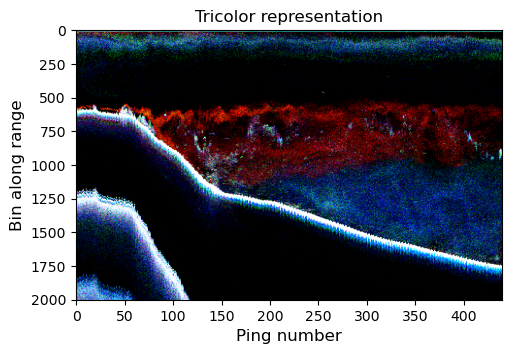

In [11]:
plt.figure(figsize=(5.5, 3.5))
plt.imshow(np.moveaxis(mtx_clip, (0,1,2), (2,1,0))[:, :, ::-1],
           aspect="auto")
plt.xlabel("Ping number", fontsize=12)
plt.ylabel("Bin along range", fontsize=12)
plt.title("Tricolor representation")
plt.show()